In [1]:
import Pkg; Pkg.activate(@__DIR__); Pkg.instantiate()

  Activating environment at `~/Documents/Study/Robotics/optimal_control_julia/lec_4/Project.toml`
Precompiling project...
  ✓ PrecompileTools
  ✓ Libmount_jll
  ✓ Libuuid_jll
  ✓ libpng_jll
  ✓ XZ_jll
  ✓ OpenSSL
  ✓ Glib_jll
  ✓ Fontconfig_jll
  ✓ Libtiff_jll
  ✓ RecipesBase
  ✓ Cairo_jll
  ✓ Qt6Base_jll
  ✓ HarfBuzz_jll
  ✓ libass_jll
  ✓ HTTP
  ✓ FFMPEG_jll
  ✓ FFMPEG
  ✓ GR_jll
  ✓ ColorSchemes
  ✓ StaticArrays
  ✓ PlotUtils
  ✓ Parsers
  ✓ ForwardDiff
  ✓ JSON
  ✓ Conda
  ✓ RecipesPipeline
  ✓ PlotThemes
  ✓ GR
  ✓ PyCall
  ✓ PyPlot
  ✓ Plots
  31 dependencies successfully precompiled in 79 seconds (127 already precompiled)
  4 dependencies precompiled but different versions are currently loaded. Restart julia to access the new versions


In [2]:
using LinearAlgebra
using ForwardDiff
using PyPlot

[ Info: Precompiling PyPlot [d330b81b-6aea-500a-939a-2ce795aea3ee]


In [7]:
Q = Diagonal([0.5; 1])
function f(x)
    return 0.5*(x-[1; 0])'*Q*(x-[1; 0])
end
function ∇f(x)
    return Q*(x-[1; 0])
end
function ∇2f(x)
    return Q
end

∇2f (generic function with 1 method)

In [8]:
function c(x)
    return x[1]^2 + 2*x[1] - x[2]
end
function ∂c(x)
    return [2*x[1]+2 -1]
end

∂c (generic function with 1 method)

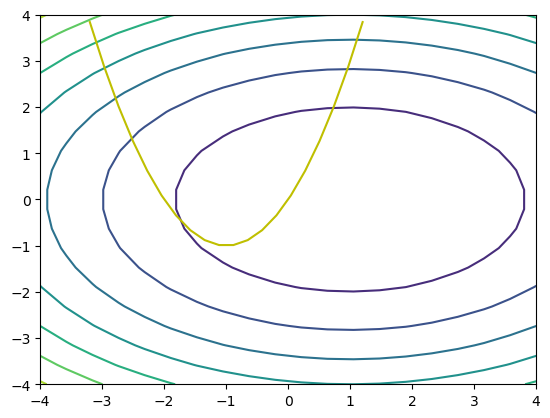

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x153c848e0>

In [9]:
function plot_landscape()
    Nsamp = 20
    Xsamp = kron(ones(Nsamp),LinRange(-4,4,Nsamp)')
    Ysamp = kron(ones(Nsamp)',LinRange(-4,4,Nsamp))
    Zsamp = zeros(Nsamp,Nsamp)
    for j = 1:Nsamp
        for k = 1:Nsamp
            Zsamp[j,k] = f([Xsamp[j,k]; Ysamp[j,k]])
        end
    end
    contour(Xsamp,Ysamp,Zsamp)

    xc = LinRange(-3.2,1.2,Nsamp)
    plot(xc,xc.^2+2.0.*xc,"y")
end

plot_landscape()

In [16]:
function newton_step(x0,λ0)
    H = ∇2f(x0) + ForwardDiff.jacobian(x -> ∂c(x)'*λ0, x0)
    C = ∂c(x0)
    Δz = [H C'; C 0]\[-∇f(x0)-C'*λ0; -c(x0)]
    Δx = Δz[1:2]
    Δλ = Δz[3]
    return x0+Δx, λ0+Δλ
end

newton_step (generic function with 1 method)

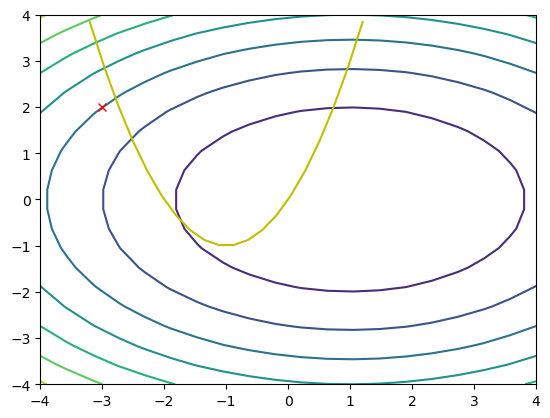

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x154f3cd30>

In [46]:
xguess = [-3; 2]
λguess = [0.0]
plot_landscape()
plot(xguess[1], xguess[2], "rx")

(C', λ0) = ([-0.8272051219201177; -1.0], -0.9954050966773471)
(∇f(x0), C' * λ0) = ([-1.2068012804800294, -0.9954050966773471], [0.8234041943568915; 0.9954050966773471])


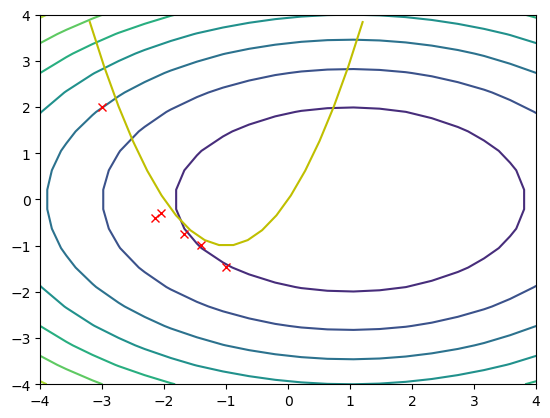

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x1546682b0>

In [51]:
xnew, λnew = newton_step(xguess[:,end],λguess[end])
xguess = [xguess xnew]
λguess = [λguess λnew]
plot_landscape()
plot(xguess[1,:], xguess[2,:], "rx")

In [ ]:
H = ∇2f(xguess[:,end]) + ForwardDiff.jacobian(x -> ∂c(x)'*λguess[end], xguess[:,end])

In [ ]:
function gauss_newton_step(x0,λ0)
    H = ∇2f(x0)
    C = ∂c(x0)
    Δz = [H C'; C 0]\[-∇f(x0)-C'*λ0; -c(x0)]
    Δx = Δz[1:2]
    Δλ = Δz[3]
    return x0+Δx, λ0+Δλ
end

In [ ]:
xguess = [-3; 2]
λguess = [0.0]
plot_landscape()
plot(xguess[1], xguess[2], "rx")

In [ ]:
xnew, λnew = gauss_newton_step(xguess[:,end],λguess[end])
xguess = [xguess xnew]
λguess = [λguess λnew]
plot_landscape()
plot(xguess[1,:], xguess[2,:], "rx")